### Q1

$ \mathbb{E} \Bigl[B_{\frac{1}{2}}(t) \Bigr] = \mathbb{E} \Bigl[\int_{0}^{t} (t-s)^{\frac{1}{2}-\frac{1}{2}} \mathrm{d}B_{s} \int_{0}^{t} (t-s)^{\frac{1}{2}-\frac{1}{2}} \mathrm{d}B_{s} \Bigr] = \mathbb{E} \Bigl[\int_{0}^{t} \mathrm{d}B_{s} \int_{0}^{t} \mathrm{d}B_{s} \Bigr]  $    
Or $ \int_{0}^{t} \mathrm{d}B_{s} = B_{t} $   
Donc $\mathbb{E} \Bigl[\int_{0}^{t} \mathrm{d}B_{s} \int_{0}^{t} \mathrm{d}B_{s} \Bigr] = \mathbb{E} \Bigl[ B_{t} B_{t} \Bigr] $   
De plus $ \mathbb{V} \Bigl[ B_t \Bigr] = \mathbb{E} \Bigl[ B_{t}^{2} \Bigr] - \mathbb{E} \Bigl[ B_t \Bigr]^2 $    
Mais comme $ (B_t)_{t \geq 0} $ est un processus centré, $ \mathbb{E} \Bigr[ B_t \Bigl] = 0 $.    
Donc $ \mathbb{V} \Bigl[ B_t \Bigr] = \mathbb{E} \Bigl[ B_{t}^{2} \Bigr] $   
Comme $ \mathbb{V} \Bigl[ B_t \Bigr]  =  \mathbb{V} \Bigl[ B_t - B_0 \Bigr] = t $ car $ (B_t - B_0) \sim \mathcal{N}(0,t)$   
Finalement $ \mathbb{E} \Bigl[B_{\frac{1}{2}}(t) \Bigr] = t $


### Q2

$ B_{\frac{1}{2}}(t) = B_t $  
$\forall t \in \mathbb{R}^{+}$, $ t \rightarrow B_t $ est continue   
Soit $(t_{i})_{0 \leq i \leq N} $ tel que $0 = t_0 < t_1 < ... t_N $, On considère le vecteur $ Z = (B_{\frac{1}{2}}(t_0), ... , B_{\frac{1}{2}}(t_N) ) = (B_{t_0}, ... , B_{t_N} ) $.   
$ \forall (\alpha_0, ... \alpha_N) \in \mathbb{R}^{N+1}$, $\sum_{i=0}^{N} \alpha_i B_{t_{i}}$ est bien gaussien   
Donc Z est un vecteur gaussien. Comme cela est vrai pour $\forall (t_{i})_{0 \leq i \leq N} $ tel que $0 = t_0 < t_1 < ... t_N $, $(B_{\frac{1}{2}}(t))_{t \leq 0} $ est un processus gaussien.    
$\mathbb{E} \Bigl[ B_{\frac{1}{2}}(t) \Bigr] = \mathbb{E} \Bigl[ B_{t} \Bigr] = 0 $. Donc le processus est centré.   
La fonction de Covariance de $(B_{\frac{1}{2}}(t))_{t \leq 0} $ est : $ \rho(s,t) = \frac{1}{2} \bigl(t+s-|t-s| \bigr) = min(s,t)$.    
On a donc un processus continu, gaussien, centré de fonction de Covariance min(s,t). Donc il s'agit du mouvement brownien. Le mouvement brownien étant une martingale, notre processus est une martingale. 

### Q3
$ \rho(s,t) = \frac{1}{2} \bigl(t+s-|t-s| \bigr)$   
si $s \leq t$ => $ \rho(s,t) = \frac{1}{2} \bigl(t+s-t+s \bigr) = s$  
si $s \geq t$ => $ \rho(s,t) = \frac{1}{2} \bigl(t+s+t-s \bigr) = t$    
donc $\rho(s,t) = min(s,t)$

### Q4.a

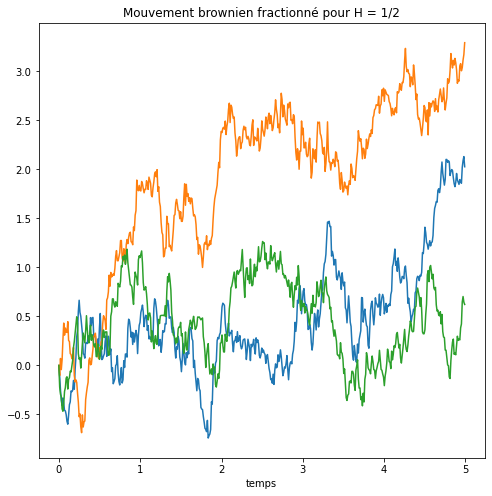

In [3]:
import numpy as np
import matplotlib.pyplot as plt 

##### données simulations ###########
T = 5
N = 100*T

def MvmtBrownian(T = T,N = N):
    h = T/(N+1)
    W = np.zeros(N+1)
    t = np.array([i*h for i in range(N+1)])
    for i in range(1,N+1):
        W[i] = W[i-1] + np.sqrt(h)*np.random.normal(0,1)   
    return (t,W)

plt.subplots(figsize=(7,4))
for i in range(3):
    t,W = MvmtBrownian()
    plt.plot(t,W)
plt.title("Mouvement brownien fractionné pour H = 1/2")
plt.xlabel("temps")
plt.show()

### Q4.b
$\mathbb{V} \Bigl[ B_{H}(t) \Bigr] = Cov \Bigl(B_{H}(t),B_{H}(t) \Bigr) = \rho(t,t) = t^{2H}$

### Q5

Soit Z notre vecteur aléatoire tel que $ Z_i = B_{H}(t_i)$ avec $0 = t_0 \leq t_1 \leq ... \leq t_N = T$   
Z est un vecteur gaussien de matrice de variance covariance $\Gamma$   
On va chercher une matrice A tel que $\Gamma = A A^{t} $ et de cette façon on pourra dire que $Z = AW$ avec W un vecteur gaussien de matrice de Variance Covariance : $\mathrm{I}_{N+1}$ 

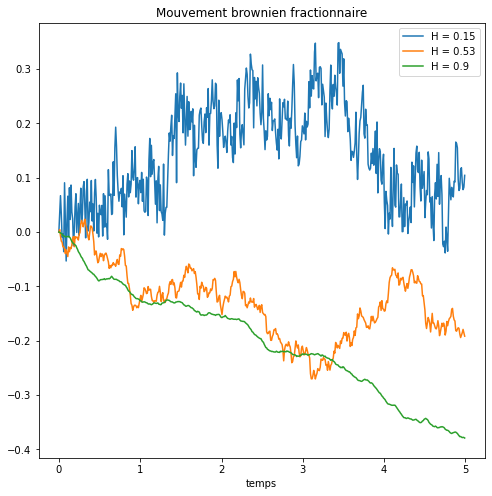

In [6]:
Hurst = [0.15,0.53,0.9]

# Cette fonction nous donne la fonction de Covariance du mouvement brownien fractionnaire
CovFrac = lambda t,s,H : 1/2 * (t**(2*H) + s**(2*H) - np.abs(t-s)**(2*H))

# Ici on fabrique la matrice de Variance-Covariance du mouvement brownien fractionnaire pour notre discrétisation de [0,T]
# L'élément ligne i, colonne j de la matrice Mat est donc \rho(t_i,t_j) 
def MatFrac(t,N,H):
    Mat = np.zeros( (N+1,N+1) )
    for i in range(1,N+1):
        for j in range(1,N+1):
            Mat[i][j] = CovFrac(t[i],t[j],H)
    return Mat 

# On génère notre vecteur de réalisation du mouvement brownien fractionnaire
def MvmtBrownianFrac(T = T, N = N, H = 1/2):
    h = T/(N+1)
    W = np.zeros(N+1)
    t = np.array([i*h for i in range(N+1)])
    for i in range(1,N+1):
        W[i] = np.sqrt(h)*np.random.normal(0,1)
    Mat = MatFrac(t,N,H)
    A = np.linalg.cholesky(Mat[1:,1:])
    B = np.zeros((N+1,N+1))
    B[1:,1:] = A
    W = np.dot(B,W)
    return (t,W)

plt.subplots(figsize=(7,4))
for val in Hurst:
    (t,W) = MvmtBrownianFrac(H = val)
    plt.plot(t,W, label= "H = {}".format(val))
plt.title("Mouvement brownien fractionnaire")
plt.xlabel("temps")
plt.legend()
plt.show()

On remarque que plus H est proche de 1, plus les trajectoires du mouvement brownien fractionnaires sont lisses. 